In [1]:
#Python Project for Data Analysis Churn Customers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\DATA ANALYST\Python\Customer Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Top Five Rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum()

0

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df["customerID"].duplicated().sum()

0

In [16]:
# coverted 0 and 1 values of senior citizen to yes/no to make it easier to understand

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


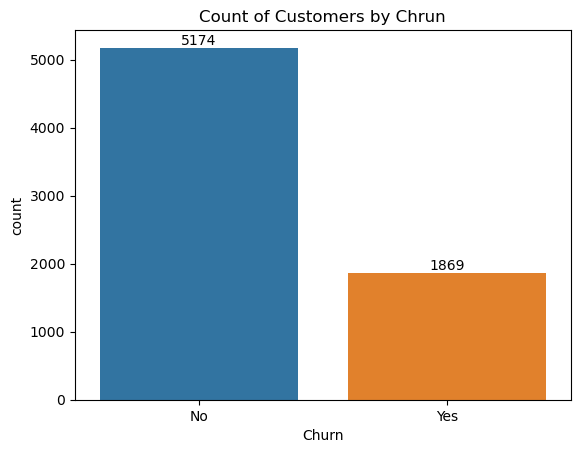

In [24]:
ax = sns.countplot(x ='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Chrun")
plt.show()

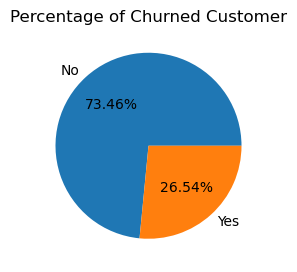

In [28]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customer", fontsize = 12)
plt.show()

# From the given pie chart we can conclude that 26.54% of our customers have churned out. 
# not let's explore the reason behind it.

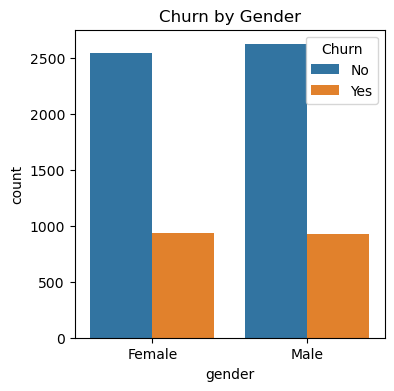

In [37]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

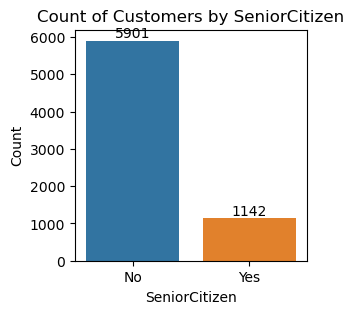

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the specified counts
data = {
    'SeniorCitizen': ['No', 'Yes'],
    'Count': [5901, 1142]  # Updated counts
}
df = pd.DataFrame(data)

plt.figure(figsize=(3, 3))
ax = sns.barplot(x='SeniorCitizen', y='Count', data=df)

# Add labels to the bars
ax.bar_label(ax.containers[0])

plt.title("Count of Customers by SeniorCitizen")
plt.ylabel("Count")
plt.show()


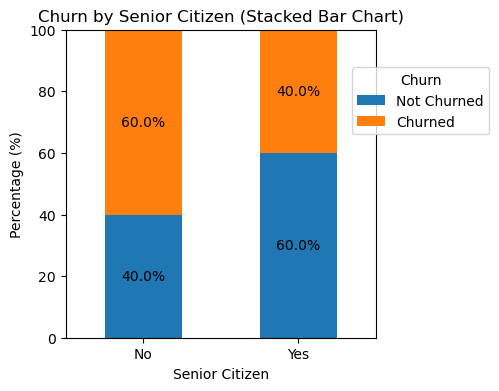

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
data = {
    'SeniorCitizen': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'Churn': [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]  # 1 = Churned, 0 = Not Churned
}
df = pd.DataFrame(data)

# Calculate percentage of churn by SeniorCitizen
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Corrected 'Kind' to 'kind'

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], bbox_to_anchor = (0.9,0.9))  # Customized Legend Location

plt.ylim(0, 100)  # Ensure y-axis goes from 0 to 100%
plt.show()


# Comprative a greater percentage of people in Senior Citizen category have churned.

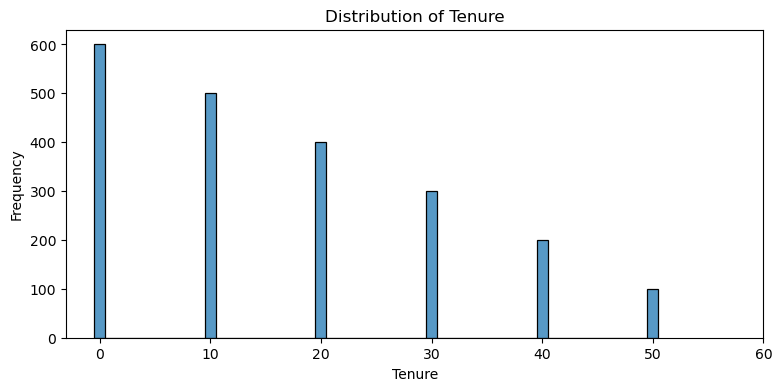

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define tenure ranges and corresponding counts
tenure = [0, 10, 20, 30, 40, 50, 60]
counts = [600, 500, 400, 300, 200, 100, 0]

# Create a DataFrame from the counts and tenure ranges
df = pd.DataFrame({'tenure': tenure, 'counts': counts})

# To create a histogram, we need to expand the tenure values according to their counts
expanded_tenure = []
for t, c in zip(tenure, counts):
    expanded_tenure.extend([t] * c)  # Repeat each tenure value according to its count

# Create a new DataFrame for the histogram
df_hist = pd.DataFrame({'tenure': expanded_tenure})

# Create histogram
plt.figure(figsize=(9, 4))
sns.histplot(df_hist['tenure'], bins=range(0, 70, 10), discrete=True)  # Using discrete bins
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.xticks(tenure)  # Set x-ticks to match tenure intervals
plt.show()


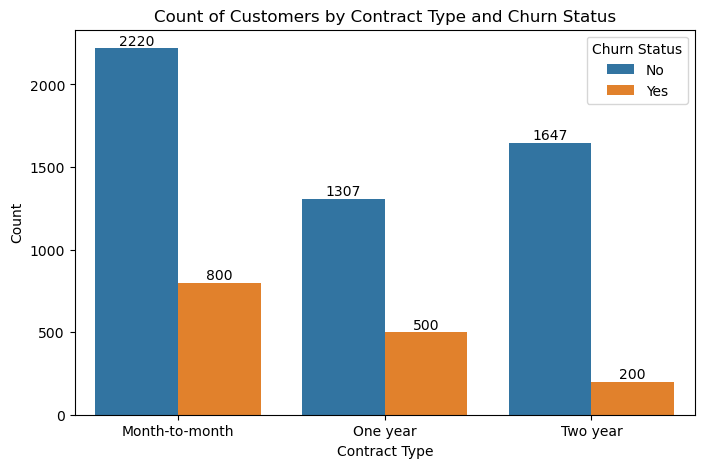

In [32]:
data = {
    'Contract': ['Month-to-month', 'Month-to-month', 'One year', 'One year', 'Two year', 'Two year'],
    'Count': [2220, 800, 1307, 500, 1647, 200],  # Example counts split by churn status
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes']  # Churn status for each count
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create bar plot with hue
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Contract', y='Count', hue='Churn', data=df)
ax.bar_label(ax.containers[0])  # Add the count labels for the 'No' bars
ax.bar_label(ax.containers[1])  # Add the count labels for the 'Yes' bars
plt.title("Count of Customers by Contract Type and Churn Status")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title='Churn Status')
plt.show()


# People who have month to month contract are likely to churn then from those who have one or two years or contract.

In [36]:
df = pd.DataFrame(data)
print(df)

         Contract  Count Churn
0  Month-to-month   2220    No
1  Month-to-month    800   Yes
2        One year   1307    No
3        One year    500   Yes
4        Two year   1647    No
5        Two year    200   Yes


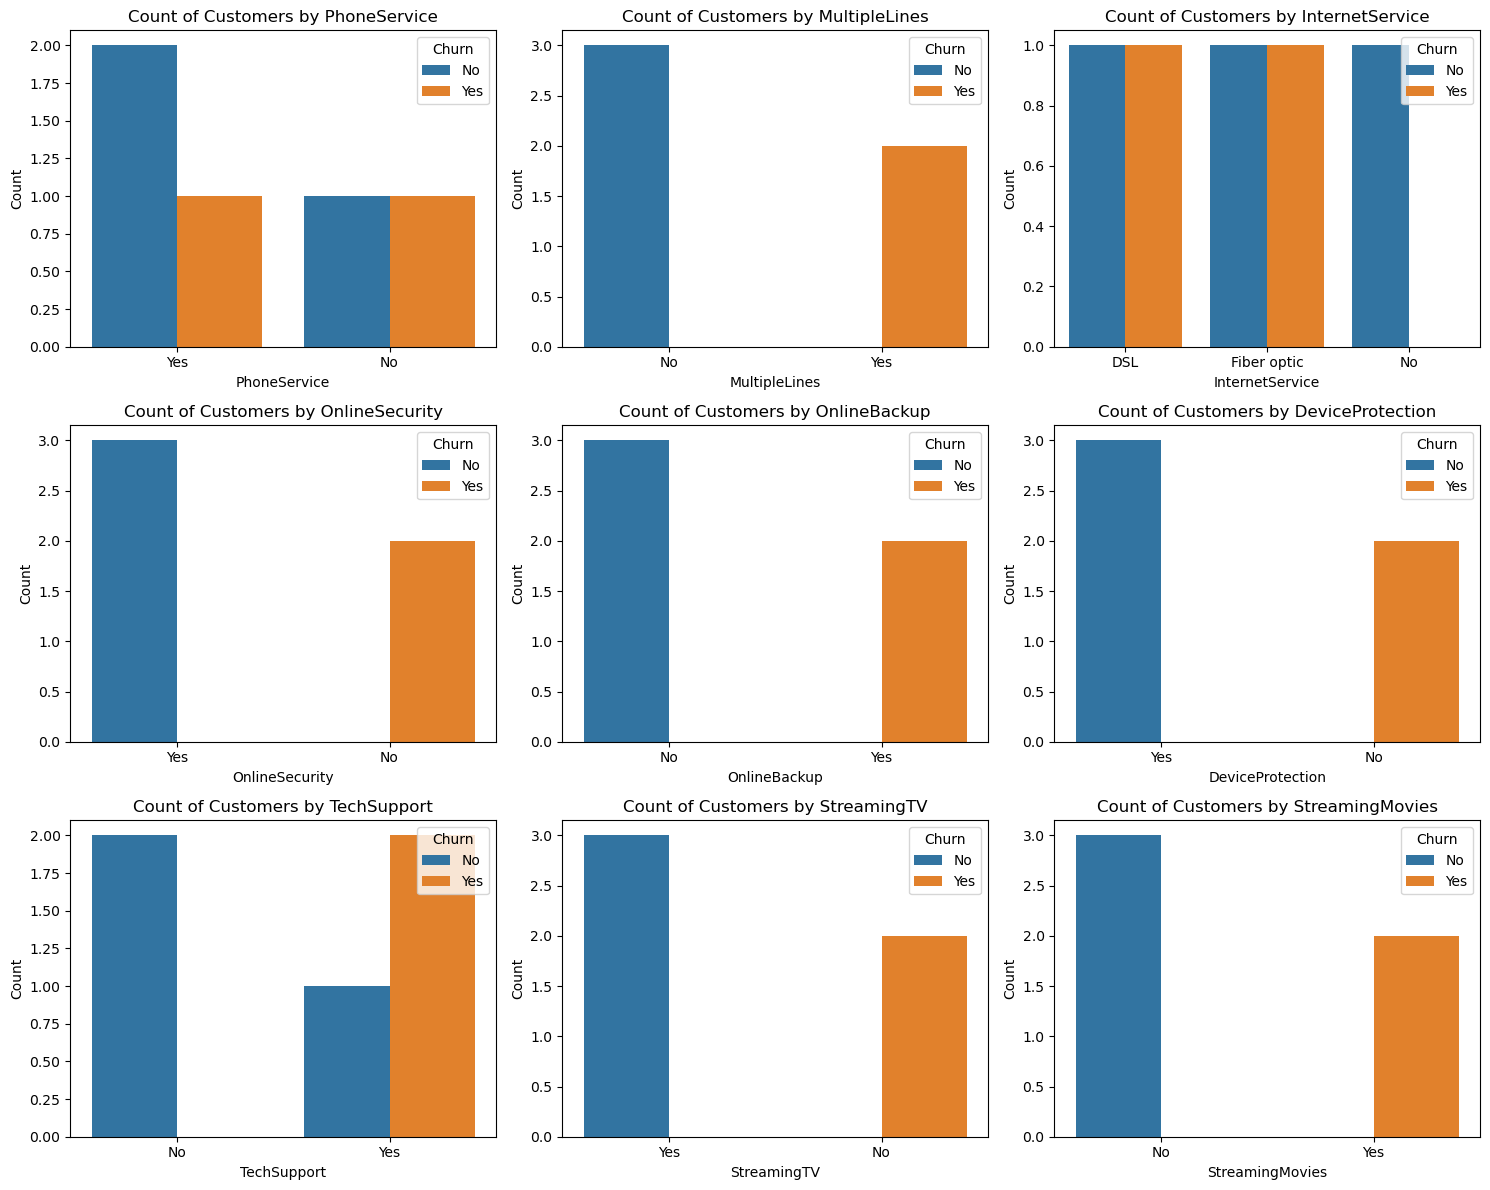

In [45]:
# Example DataFrame creation (including the 'Churn' column)
data = {
    's(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create count plots for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn')  # Use hue='Churn'
    axes[i].set_title(f'Count of Customers by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'No', 'DSL', 'Fiber optic'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['No', 'Yes', 'No', 'Yes', 'No'],
    'DeviceProtection': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'TechSupport': ['No', 'Yes', 'No', 'Yes', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No']  # Adding the 'Churn' column
}

df = pd.DataFrame(data)

# List of columns to create countplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [46]:
print(df.columns)


Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn'],
      dtype='object')


# 
The image shows .various bar plots representing the count of customers by different services such as PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Each plot compares the count of customers who churned versus those who didn't (No vs Yes) across these services. It highlights significant patterns, such as higher churn rates for customers without TechSupport, OnlineSecurity, and DeviceProtection, and lower churn rates for those with PhoneService and OnlineBackup